# NNFS Chapter 3 - Adding Layers

In [1]:
! pip install nnfs

In [11]:
import numpy as np

inputs = [
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8]
]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]
weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]
biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

## Training Data

We will use the `nnfs` package from pip, which was heavily inspired on [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/neural-networks-case-study/)

Generating a dataset this way is purely for convenience at this stage. We will also use this package to ensure repeatability for everyone, using nnfs.init(), after importing NumPy

In [12]:
import nnfs
nnfs.init() #We will also use this package to ensure repeatability for everyone, using nnfs.init(), after importing NumPy
from nnfs.datasets import spiral_data


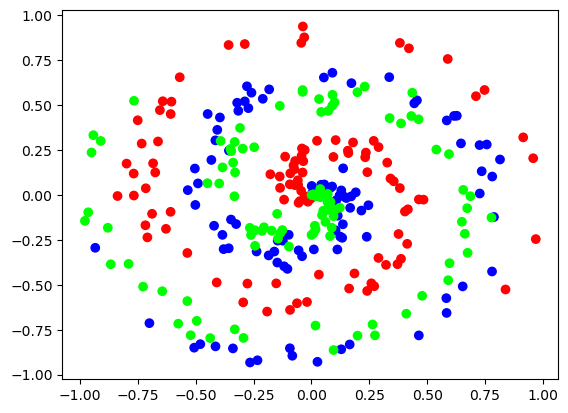

In [13]:
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

Keep in mind that the neural network will not be aware of the color differences as the data have no class encodings. This is only made as an instruction for the reader. In the data above, each of the dot's coordinate values represents a feature, so each dot is a representation of the featureset. The “classification” for that dot has to do with which spiral it is a part of, depicted by blue, green, or red color in the previous image. These colors would then be assigned a class number for the model to fit to, like 0, 1, and 2.

In [14]:
class DenseLayer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.output = None

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

 `np.random.randn()` produces a Gaussian distribution with a mean of 0 and a variance of 1, which means that it’ll generate random numbers, positive and negative, centered at 0 and with the mean value close to 0.


In [15]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = DenseLayer(2, 3)
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Let's see output of the first few samples:
dense1.output[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.11171044e-04, -5.11007493e-05, -1.12099799e-04],
       [ 2.99257295e-06, -2.69126613e-04, -1.45165104e-04],
       [ 8.95101766e-05, -4.30442247e-04, -1.68079801e-04],
       [-3.49893759e-04, -3.07208364e-04, -4.33002861e-04]], dtype=float32)